<a href="https://colab.research.google.com/github/harshithap99/Hand_drawn_Sketch_recognition/blob/main/Scratch_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import keras 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import glob
from sklearn.datasets import load_files
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import  train_test_split

In [ ]:
img=glob.glob(("/content/drive/My Drive/sketch_80/*"))
for i in img:
    print(i)

/content/drive/My Drive/sketch_80/cannon
/content/drive/My Drive/sketch_80/camera
/content/drive/My Drive/sketch_80/castle
/content/drive/My Drive/sketch_80/candle
/content/drive/My Drive/sketch_80/camel
/content/drive/My Drive/sketch_80/canoe
/content/drive/My Drive/sketch_80/cell phone
/content/drive/My Drive/sketch_80/car (sedan)
/content/drive/My Drive/sketch_80/carrot
/content/drive/My Drive/sketch_80/cat
/content/drive/My Drive/sketch_80/cake
/content/drive/My Drive/sketch_80/bush
/content/drive/My Drive/sketch_80/butterfly
/content/drive/My Drive/sketch_80/bread
/content/drive/My Drive/sketch_80/calculator
/content/drive/My Drive/sketch_80/bulldozer
/content/drive/My Drive/sketch_80/cactus
/content/drive/My Drive/sketch_80/cabinet
/content/drive/My Drive/sketch_80/bus
/content/drive/My Drive/sketch_80/bridge
/content/drive/My Drive/sketch_80/bowl
/content/drive/My Drive/sketch_80/boomerang
/content/drive/My Drive/sketch_80/book
/content/drive/My Drive/sketch_80/binoculars
/conte

In [ ]:
dir = '/content/drive/My Drive/sketch_80'
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x, y,target_labels = load_dataset(dir)
print('Loading complete!')
print('Training set size : ' , x.shape[0])

Loading complete!
Training set size :  6400


In [ ]:
no_of_classes = len(np.unique(y))
print(target_labels)
print(no_of_classes)
#print(y)
y= np_utils.to_categorical(y,no_of_classes)

['airplane' 'alarm clock' 'angel' 'ant' 'apple' 'arm' 'armchair' 'ashtray'
 'axe' 'backpack' 'banana' 'barn' 'baseball bat' 'basket' 'bathtub'
 'bear (animal)' 'bed' 'bee' 'beer-mug' 'bell' 'bench' 'bicycle'
 'binoculars' 'blimp' 'book' 'bookshelf' 'boomerang' 'bottle opener'
 'bowl' 'brain' 'bread' 'bridge' 'bulldozer' 'bus' 'bush' 'butterfly'
 'cabinet' 'cactus' 'cake' 'calculator' 'camel' 'camera' 'candle' 'cannon'
 'canoe' 'car (sedan)' 'carrot' 'castle' 'cat' 'cell phone' 'chandelier'
 'church' 'cigarette' 'cloud' 'comb' 'computer monitor' 'computer-mouse'
 'couch' 'cow' 'crab' 'crane (machine)' 'crocodile' 'crown' 'cup'
 'diamond' 'dog' 'dolphin' 'donut' 'door' 'door handle' 'dragon' 'duck'
 'ear' 'elephant' 'envelope' 'eye' 'eyeglasses' 'face' 'feather'
 'fire hydrant']
80


In [ ]:
#dividing the entire dataset into training data and validation data
X_train,x_val,Y_train,y_val = train_test_split(x,y,test_size=0.18,random_state=42)
#dividing the training dataset into training and testing
X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.22,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
# sum should result in total
print(len(X_train))
print(len(x_val))
print(len(x_test))

4093
1152
1155


In [ ]:
default_image_size=tuple((256,256))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
x_val = np.array(convert_image_to_array(x_val))
x_test = np.array(convert_image_to_array(x_test))
print('Validation set shape : ',x_val.shape)
print('Training set shape : ',X_train.shape)
print('Test set shape : ',x_test.shape)

Validation set shape :  (1152, 256, 256, 3)
Training set shape :  (4093, 256, 256, 3)
Test set shape :  (1155, 256, 256, 3)


In [ ]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

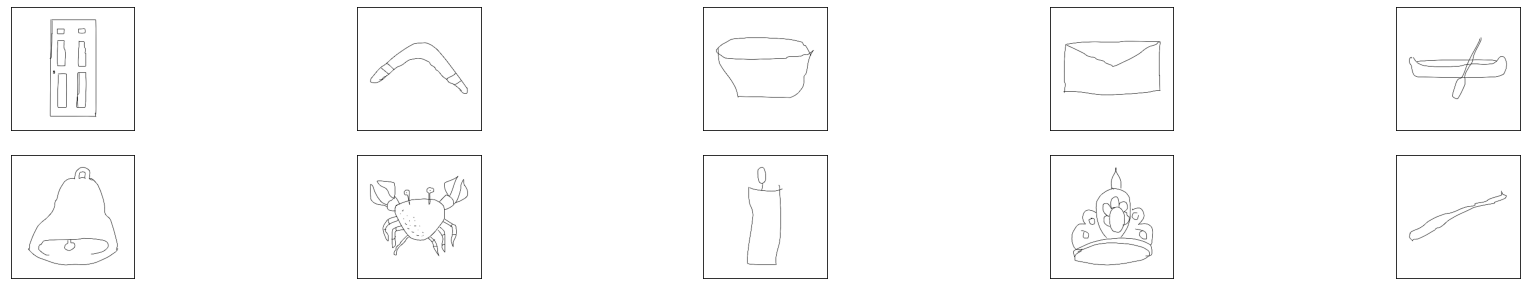

In [ ]:
#Let's visualize the first 10 training images!
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [ ]:
from keras.layers import GlobalAveragePooling2D 
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(no_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       5

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [ ]:
checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
model_dropout = model.fit_generator(imagegen.flow(X_train,Y_train, batch_size=64),epochs=100,verbose=2,
                        validation_data=(x_val, y_val),steps_per_epoch=X_train.shape[0] // 32,callbacks=[checkpoint],shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/99

Epoch 00001: val_accuracy improved from -inf to 0.01476, saving model to cnn3.hdf5
63/63 - 58s - loss: 4.3296 - accuracy: 0.0544 - val_loss: 5.7560 - val_accuracy: 0.0148
Epoch 2/99

Epoch 00002: val_accuracy did not improve from 0.01476
63/63 - 57s - loss: 3.9772 - accuracy: 0.0839 - val_loss: 9.7319 - val_accuracy: 0.0095
Epoch 3/99

Epoch 00003: val_accuracy did not improve from 0.01476
63/63 - 58s - loss: 3.8596 - accuracy: 0.0916 - val_loss: 11.6340 - val_accuracy: 0.0139
Epoch 4/99

Epoch 00004: val_accuracy did not improve from 0.01476
63/63 - 58s - loss: 3.6987 - accuracy: 0.1204 - val_loss: 17.5253 - val_accuracy: 0.0148
Epoch 5/99

Epoch 00005: val_accuracy did not improve from 0.01476
63/63 - 58s - loss: 3.6395 - accuracy: 0.1276 - val_loss: 23.9909 - val_accuracy: 0.0095
Epoch 6/99

Epoch 00006: val_accuracy did not improve from 0.01476
63/63 - 57s - loss: 3.4778 - accuracy: 0.1457 - val

In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=2)

37/37 - 2s - loss: 73.9483 - accuracy: 0.0190


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
y_true = np.argmax(y_test,axis = 1).astype(int)

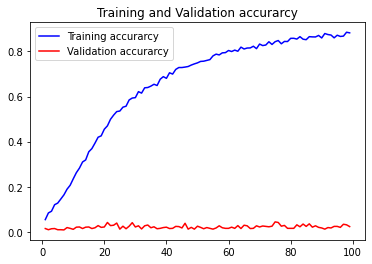

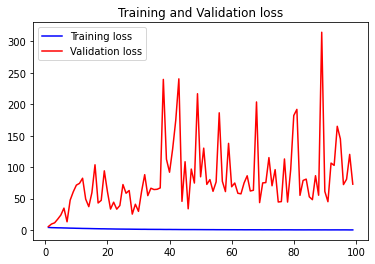

In [ ]:
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("Found %d correct" %(corr_count))
print("Found %d incorrect " %(incorr_count))

Found 22 correct
Found 1133 incorrect 


In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))